# ÌåêÎß§Ï§ÄÎπÑÌïòÍ∏∞ AB test Î∂ÑÏÑù

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import chi2_contingency, beta
from statsmodels.stats.proportion import proportions_ztest
from statsmodels.stats.multitest import multipletests


# ‚úÖ Ï†ÑÏ≤¥ float Ï∂úÎ†• Ìè¨Îß∑ ÏÜåÏàòÏ†ê 4ÏûêÎ¶¨Î°ú Í≥†Ï†ï (ÌòÑÏû¨ ÏÑ∏ÏÖòÏóêÎßå Ï†ÅÏö©. python Îã§Ïãú ÏãúÏûëÌïòÎ©¥ Îã§Ïãú ÏÑ§Ï†ïÌï¥Ï§òÏïº Ìï®.)
pd.set_option('display.float_format', '{:.4f}'.format)

# Metric Î≥Ñ ÌÜµÍ≥Ñ Í≤ÄÏ†ï

- abtest_multi(groups, successes, trials, metric_name="") -> A,B,C 3group Ïù¥ÏÉÅÏù∏ Í≤ΩÏö∞ ÏÇ¨Ïö©

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import chi2_contingency
from statsmodels.stats.proportion import proportions_ztest
from statsmodels.stats.multitest import multipletests

def abtest_multi(groups, successes, trials, metric_name="Metric", samples=100_000):
    failures = trials - successes
    conversion_rates = successes / trials

    # ‚úÖ metric_name ÏµúÏÉÅÎã® Ï∂úÎ†• (ÌÅ∞ Ï†úÎ™©)
    print("\n" + "#"*70)
    print(f"üìä {metric_name}\n" + "#"*70)
    
    
    # ‚úÖ Í∑∏Î£πÎ≥Ñ Ï†ÑÌôòÏú® Ï∂úÎ†•
    group_summary = pd.DataFrame({
        'Group': groups,
        'Successes': successes,
        'Trials': trials,
        'Conversion Rate': pd.Series(conversion_rates).map(lambda x: f"{x*100:.2f}%")
    })
    print("\n‚úÖ Group Summary (Successes, Trials, Conversion Rate)")
    display(group_summary)
    print(f"\n{'='*60}")

    # for grp, rate in zip(groups, conversion_rates):
    #     print(f"{grp} group conversion rate: {rate:.2%}")

    # ‚úÖ Ï†ÑÌÜµÏ†Å ÌÜµÍ≥ÑÍ≤ÄÏ†ï: Chi-square test
    # Chi-square test
    contingency_table = np.array([successes, failures]).T
    chi2, p_value, _, _ = chi2_contingency(contingency_table)
    print("\n‚úÖ Chi-square Test")
    print(f"- Chi2 statistic: {chi2:.4f}")
    print(f"- p-value: {p_value:.4f}")
    print(f"\n{'='*60}")



    # ‚úÖ ÏÇ¨ÌõÑ Pairwise Z-test (Holm-Bonferroni Î≥¥Ï†ï)
    # ÎπàÎèÑÏ£ºÏùò Î≥¥ÏàòÏ†Å Î∞©Ïãù
    # Pairwise Z-test (Holm-Bonferroni)
    pairwise_results, pairs = [], []
    for i in range(len(groups)):
        for j in range(i + 1, len(groups)):
            count = np.array([successes[i], successes[j]])
            nobs = np.array([trials[i], trials[j]])
            _, p = proportions_ztest(count, nobs)
            pairwise_results.append(p)
            pairs.append(f"{groups[i]} vs {groups[j]}")

    reject, pvals_corrected, _, _ = multipletests(pairwise_results, alpha=0.05, method='holm')
    results_df = pd.DataFrame({
        'Comparison': pairs,
        'Uncorrected p-value': pairwise_results,
        'Corrected p-value (Holm)': pvals_corrected,
        'Significant': reject
    })
    print("\n‚úÖ Pairwise Z-test (Holm-Bonferroni):")
    display(results_df)
    print(f"\n{'='*60}")



    # ‚úÖ ÏÇ¨ÌõÑ Pairwise Z-test (FDR Î≥¥Ï†ï, Ïú†Ïó∞Ìïú Î∞©Ïãù)
    # ÎπàÎèÑÏ£ºÏùò Ïú†Ïó∞Ìïú Î∞©Ïãù
    # Pairwise Z-test (FDR)
    reject_fdr, pvals_fdr_corrected, _, _ = multipletests(pairwise_results, alpha=0.05, method='fdr_bh')
    results_df_fdr = pd.DataFrame({
        'Comparison': pairs,
        'Uncorrected p-value': pairwise_results,
        'Corrected p-value (FDR)': pvals_fdr_corrected,
        'Significant (FDR)': reject_fdr
    })
    print("\n‚úÖ Pairwise Z-test (FDR - Benjamini-Hochberg):")
    display(results_df_fdr)
    print(f"\n{'='*60}")


    # ÌÜµÍ≥ÑÍ≤ÄÏ†ï Í∞í Í≥†Ï†ïÌïòÍ∏∞ ÏúÑÌïú random seed Í≥†Ï†ï
    # np.random.seed(42)  # ÏõêÌïòÎäî Ï†ïÏàò ÏÇ¨Ïö© -> Î≤†Ïù¥ÏßÄÏïà Í≤∞Í≥ºÍ∞í Í≥†Ï†ïÌïòÍ∏∞ ÏúÑÌï® -> ÎûúÎç§ ÏÉòÌîåÏùò ÏãúÎìú Í≥†Ï†ïÌïòÎäî ÏΩîÎìú

    # Bayesian analysis
    posterior_samples = {
        group: np.random.beta(1 + success, 1 + fail, samples)    
        for group, success, fail in zip(groups, successes, failures)
    }

    # ‚úÖ Bayesian posterior Î∂ÑÌè¨ ÏãúÍ∞ÅÌôî
    plt.figure(figsize=(12, 7))
    for group in groups:
        sns.kdeplot(posterior_samples[group], label=f'Group {group}')
    plt.title('Posterior Distributions of Conversion Rates', fontsize=16)
    plt.xlabel('Conversion Rate')
    plt.ylabel('Density')
    plt.legend()
    plt.grid(True)
    plt.show()
    print(f"\n{'='*60}")


    # ‚úÖ Bayesian: Í∞Å Í∑∏Î£πÏù¥ Í∞ÄÏû• Ïö∞ÏàòÌï† ÌôïÎ•† Í≥ÑÏÇ∞
    best_group_count = {group: 0 for group in groups}
    for i in range(samples):
        best_group = max(posterior_samples, key=lambda g: posterior_samples[g][i])
        best_group_count[best_group] += 1

    print("\n‚úÖ Bayesian: Probability that each group is best")
    for group, count in best_group_count.items():
        prob = count / samples
        print(f"Probability that {group} is the best: {prob:.2%}")
    print(f"\n{'='*60}")

    # ‚úÖ Bayesian: ÏåçÎ≥Ñ Ïö∞ÏúÑ ÌôïÎ•† Í≥ÑÏÇ∞
    # Bayesian pairwise superiority
    pairwise_bayes = []
    for i in range(len(groups)):
        for j in range(i + 1, len(groups)):
            g1, g2 = groups[i], groups[j]
            prob = np.mean(posterior_samples[g1] > posterior_samples[g2])
            pairwise_bayes.append({
                'Comparison': f"{g1} > {g2}",
                'P(Group1 > Group2)': prob,
                'P(Group1 < Group2)': 1 - prob
            })
    df_bayes = pd.DataFrame(pairwise_bayes)
    print("\n‚úÖ Bayesian Pairwise Superiority Probabilities:")
    display(df_bayes)
    print(f"\n{'='*60}")



######################################################################
üìä My car to ReadyToSell Confirm CVR
######################################################################

‚úÖ Group Summary (Successes, Trials, Conversion Rate)


Group  Successes  Trials Conversion Rate
0     A       1741   31934           5.45%
1     B       1587   32265           4.92%
2     C       2162   32229           6.71%
3     D       3023   32035           9.44%



‚úÖ Chi-square Test
- Chi2 statistic: 632.4641
- p-value: 0.0000


‚úÖ Pairwise Z-test (Holm-Bonferroni):


Comparison  Uncorrected p-value  Corrected p-value (Holm)  Significant
0     A vs B               0.0023                    0.0023         True
1     A vs C               0.0000                    0.0000         True
2     A vs D               0.0000                    0.0000         True
3     B vs C               0.0000                    0.0000         True
4     B vs D               0.0000                    0.0000         True
5     C vs D               0.0000                    0.0000         True



‚úÖ Pairwise Z-test (FDR - Benjamini-Hochberg):


Comparison  Uncorrected p-value  Corrected p-value (FDR)  Significant (FDR)
0     A vs B               0.0023                   0.0023               True
1     A vs C               0.0000                   0.0000               True
2     A vs D               0.0000                   0.0000               True
3     B vs C               0.0000                   0.0000               True
4     B vs D               0.0000                   0.0000               True
5     C vs D               0.0000                   0.0000               True

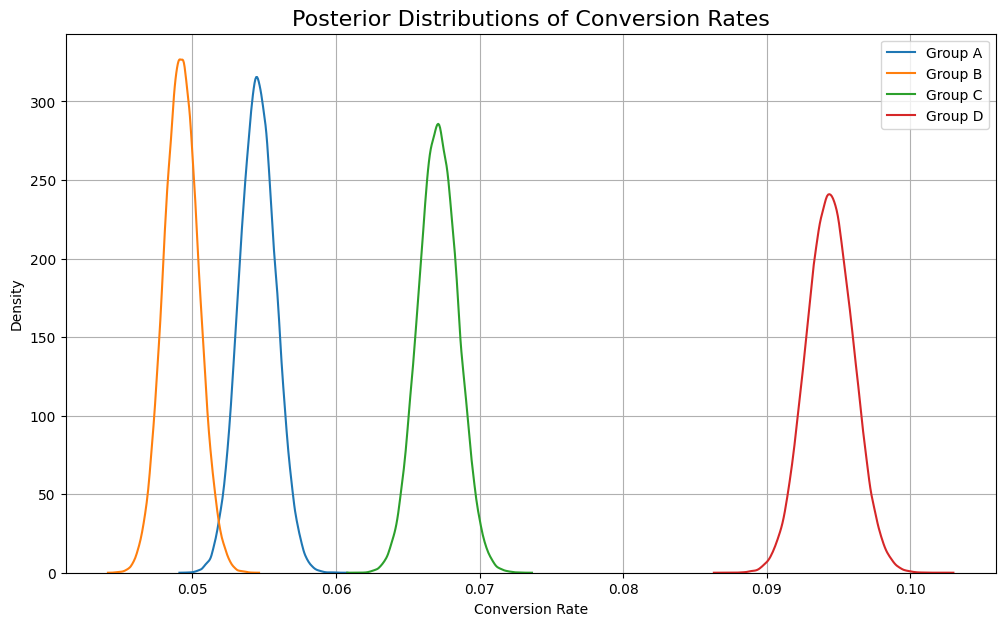



‚úÖ Bayesian: Probability that each group is best
Probability that A is the best: 0.00%
Probability that B is the best: 0.00%
Probability that C is the best: 0.00%
Probability that D is the best: 100.00%


‚úÖ Bayesian Pairwise Superiority Probabilities:


Comparison  P(Group1 > Group2)  P(Group1 < Group2)
0      A > B              0.9989              0.0011
1      A > C              0.0000              1.0000
2      A > D              0.0000              1.0000
3      B > C              0.0000              1.0000
4      B > D              0.0000              1.0000
5      C > D              0.0000              1.0000



######################################################################
üìä My car to ReadyToSell Click CVR
######################################################################

‚úÖ Group Summary (Successes, Trials, Conversion Rate)


Group  Successes  Trials Conversion Rate
0     A       3433   31934          10.75%
1     B       2808   32265           8.70%
2     C       5114   32229          15.87%
3     D      10045   32035          31.36%



‚úÖ Chi-square Test
- Chi2 statistic: 7272.9508
- p-value: 0.0000


‚úÖ Pairwise Z-test (Holm-Bonferroni):


Comparison  Uncorrected p-value  Corrected p-value (Holm)  Significant
0     A vs B               0.0000                    0.0000         True
1     A vs C               0.0000                    0.0000         True
2     A vs D               0.0000                    0.0000         True
3     B vs C               0.0000                    0.0000         True
4     B vs D               0.0000                    0.0000         True
5     C vs D               0.0000                    0.0000         True



‚úÖ Pairwise Z-test (FDR - Benjamini-Hochberg):


Comparison  Uncorrected p-value  Corrected p-value (FDR)  Significant (FDR)
0     A vs B               0.0000                   0.0000               True
1     A vs C               0.0000                   0.0000               True
2     A vs D               0.0000                   0.0000               True
3     B vs C               0.0000                   0.0000               True
4     B vs D               0.0000                   0.0000               True
5     C vs D               0.0000                   0.0000               True

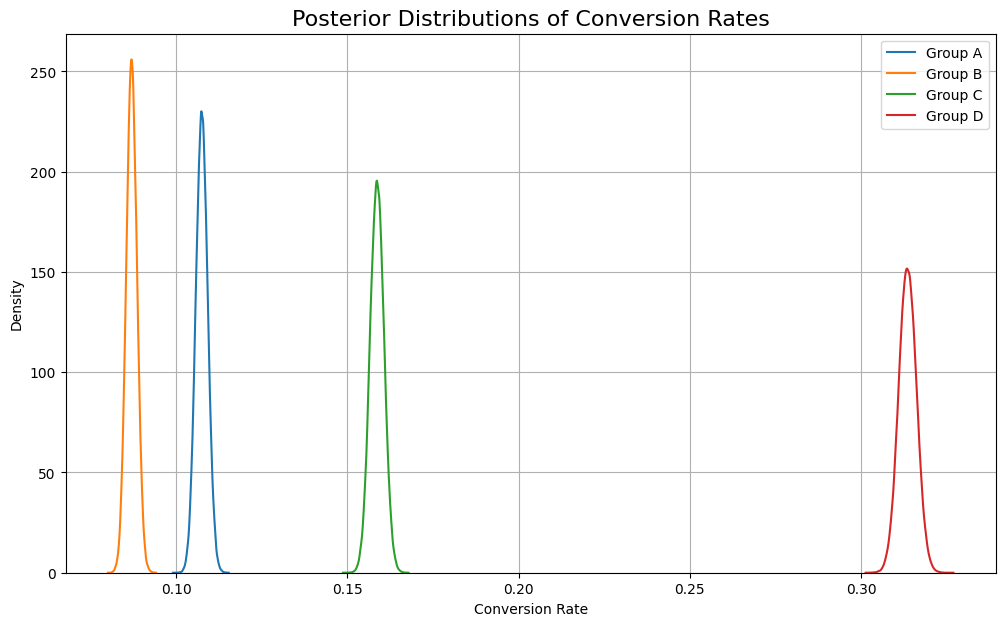



‚úÖ Bayesian: Probability that each group is best
Probability that A is the best: 0.00%
Probability that B is the best: 0.00%
Probability that C is the best: 0.00%
Probability that D is the best: 100.00%


‚úÖ Bayesian Pairwise Superiority Probabilities:


Comparison  P(Group1 > Group2)  P(Group1 < Group2)
0      A > B              1.0000              0.0000
1      A > C              0.0000              1.0000
2      A > D              0.0000              1.0000
3      B > C              0.0000              1.0000
4      B > D              0.0000              1.0000
5      C > D              0.0000              1.0000



######################################################################
üìä My car to ReadyToSell CVR
######################################################################

‚úÖ Group Summary (Successes, Trials, Conversion Rate)


Group  Successes  Trials Conversion Rate
0     A       2730   31934           8.55%
1     B       2213   32265           6.86%
2     C       3714   32229          11.52%
3     D       6689   32035          20.88%



‚úÖ Chi-square Test
- Chi2 statistic: 3580.5878
- p-value: 0.0000


‚úÖ Pairwise Z-test (Holm-Bonferroni):


Comparison  Uncorrected p-value  Corrected p-value (Holm)  Significant
0     A vs B               0.0000                    0.0000         True
1     A vs C               0.0000                    0.0000         True
2     A vs D               0.0000                    0.0000         True
3     B vs C               0.0000                    0.0000         True
4     B vs D               0.0000                    0.0000         True
5     C vs D               0.0000                    0.0000         True



‚úÖ Pairwise Z-test (FDR - Benjamini-Hochberg):


Comparison  Uncorrected p-value  Corrected p-value (FDR)  Significant (FDR)
0     A vs B               0.0000                   0.0000               True
1     A vs C               0.0000                   0.0000               True
2     A vs D               0.0000                   0.0000               True
3     B vs C               0.0000                   0.0000               True
4     B vs D               0.0000                   0.0000               True
5     C vs D               0.0000                   0.0000               True

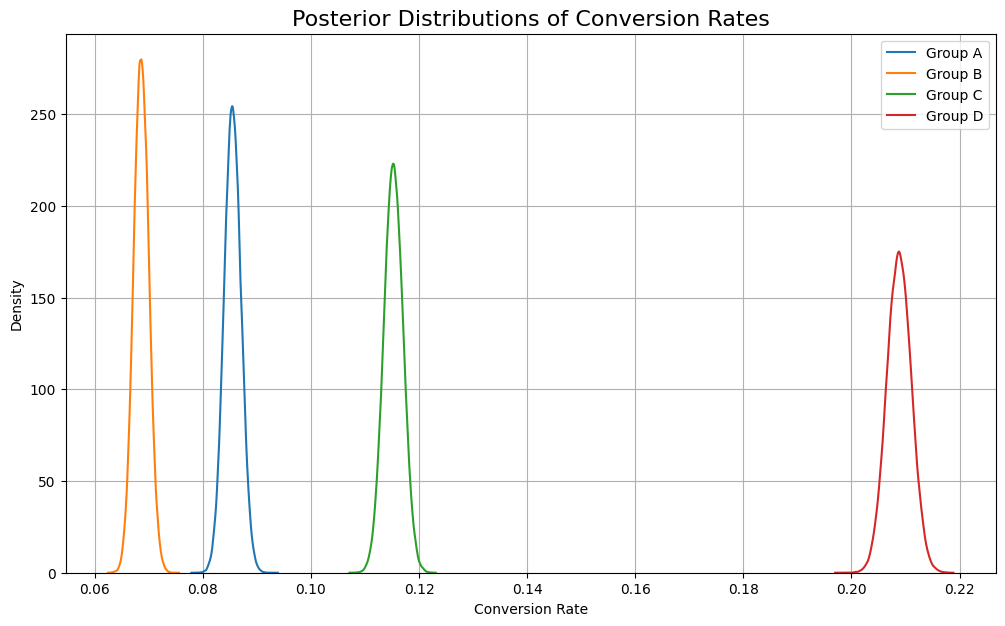



‚úÖ Bayesian: Probability that each group is best
Probability that A is the best: 0.00%
Probability that B is the best: 0.00%
Probability that C is the best: 0.00%
Probability that D is the best: 100.00%


‚úÖ Bayesian Pairwise Superiority Probabilities:


Comparison  P(Group1 > Group2)  P(Group1 < Group2)
0      A > B              1.0000              0.0000
1      A > C              0.0000              1.0000
2      A > D              0.0000              1.0000
3      B > C              0.0000              1.0000
4      B > D              0.0000              1.0000
5      C > D              0.0000              1.0000



######################################################################
üìä My car to Request a Estimate Complete CVR
######################################################################

‚úÖ Group Summary (Successes, Trials, Conversion Rate)


Group  Successes  Trials Conversion Rate
0     A       3377   31934          10.57%
1     B       3667   32265          11.37%
2     C       3666   32229          11.37%
3     D       3669   32035          11.45%



‚úÖ Chi-square Test
- Chi2 statistic: 16.4878
- p-value: 0.0009


‚úÖ Pairwise Z-test (Holm-Bonferroni):


Comparison  Uncorrected p-value  Corrected p-value (Holm)  Significant
0     A vs B               0.0014                    0.0060         True
1     A vs C               0.0012                    0.0060         True
2     A vs D               0.0004                    0.0023         True
3     B vs C               0.9694                    1.0000        False
4     B vs D               0.7261                    1.0000        False
5     C vs D               0.7551                    1.0000        False



‚úÖ Pairwise Z-test (FDR - Benjamini-Hochberg):


Comparison  Uncorrected p-value  Corrected p-value (FDR)  Significant (FDR)
0     A vs B               0.0014                   0.0027               True
1     A vs C               0.0012                   0.0027               True
2     A vs D               0.0004                   0.0023               True
3     B vs C               0.9694                   0.9694              False
4     B vs D               0.7261                   0.9061              False
5     C vs D               0.7551                   0.9061              False

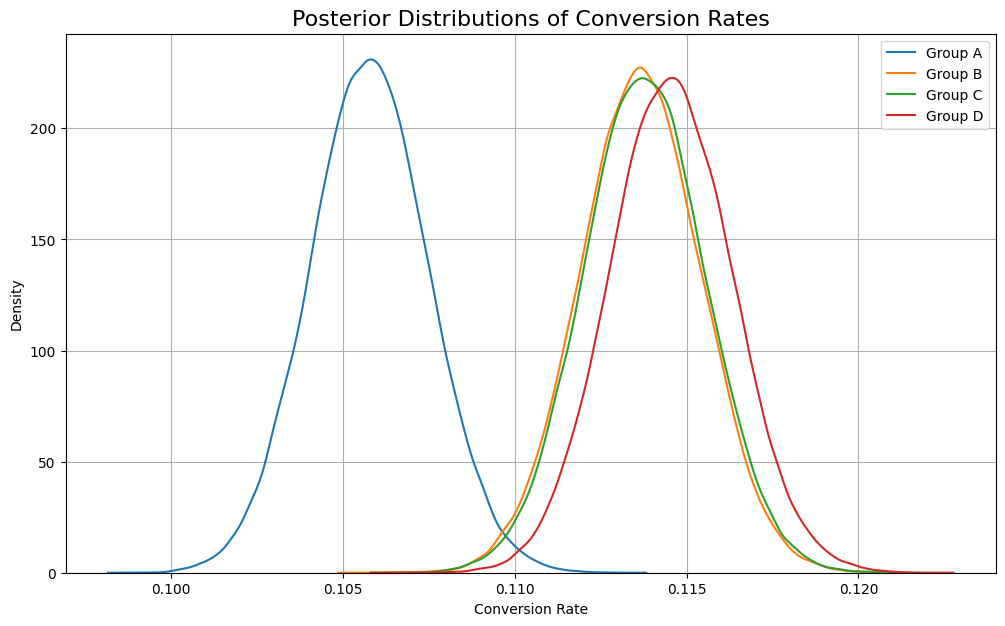



‚úÖ Bayesian: Probability that each group is best
Probability that A is the best: 0.00%
Probability that B is the best: 25.29%
Probability that C is the best: 27.46%
Probability that D is the best: 47.26%


‚úÖ Bayesian Pairwise Superiority Probabilities:


Comparison  P(Group1 > Group2)  P(Group1 < Group2)
0      A > B              0.0007              0.9993
1      A > C              0.0007              0.9993
2      A > D              0.0001              0.9999
3      B > C              0.4824              0.5176
4      B > D              0.3635              0.6365
5      C > D              0.3793              0.6207



######################################################################
üìä My car to Request a Estimate Click 1 CVR
######################################################################

‚úÖ Group Summary (Successes, Trials, Conversion Rate)


Group  Successes  Trials Conversion Rate
0     A      12254   31934          38.37%
1     B      13832   32265          42.87%
2     C      12978   32229          40.27%
3     D      13644   32035          42.59%



‚úÖ Chi-square Test
- Chi2 statistic: 178.3222
- p-value: 0.0000


‚úÖ Pairwise Z-test (Holm-Bonferroni):


Comparison  Uncorrected p-value  Corrected p-value (Holm)  Significant
0     A vs B               0.0000                    0.0000         True
1     A vs C               0.0000                    0.0000         True
2     A vs D               0.0000                    0.0000         True
3     B vs C               0.0000                    0.0000         True
4     B vs D               0.4745                    0.4745        False
5     C vs D               0.0000                    0.0000         True



‚úÖ Pairwise Z-test (FDR - Benjamini-Hochberg):


Comparison  Uncorrected p-value  Corrected p-value (FDR)  Significant (FDR)
0     A vs B               0.0000                   0.0000               True
1     A vs C               0.0000                   0.0000               True
2     A vs D               0.0000                   0.0000               True
3     B vs C               0.0000                   0.0000               True
4     B vs D               0.4745                   0.4745              False
5     C vs D               0.0000                   0.0000               True

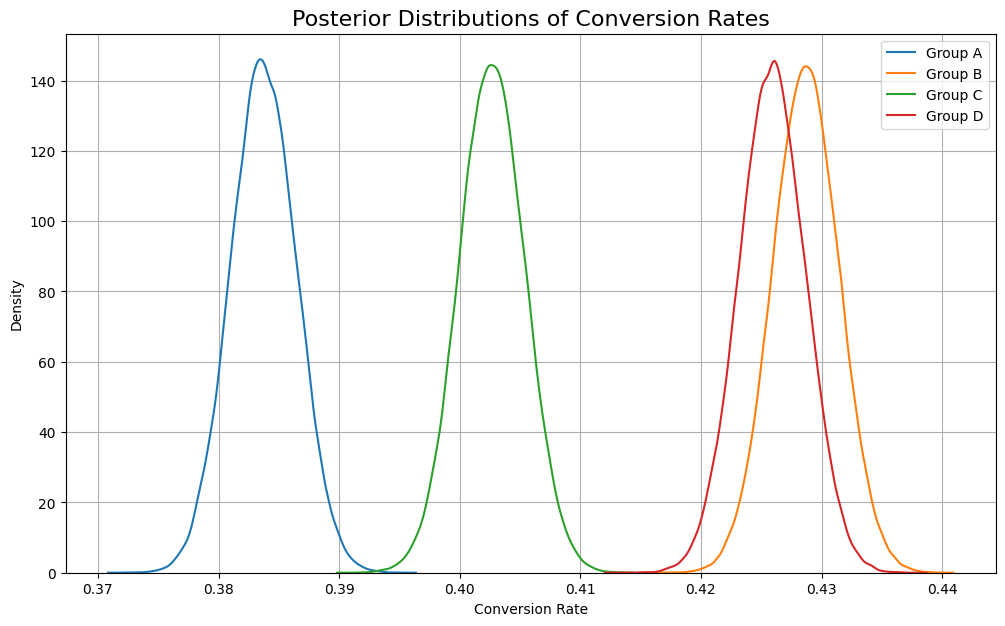



‚úÖ Bayesian: Probability that each group is best
Probability that A is the best: 0.00%
Probability that B is the best: 76.26%
Probability that C is the best: 0.00%
Probability that D is the best: 23.74%


‚úÖ Bayesian Pairwise Superiority Probabilities:


Comparison  P(Group1 > Group2)  P(Group1 < Group2)
0      A > B              0.0000              1.0000
1      A > C              0.0000              1.0000
2      A > D              0.0000              1.0000
3      B > C              1.0000              0.0000
4      B > D              0.7626              0.2374
5      C > D              0.0000              1.0000



######################################################################
üìä My car to Request a Estimate Click 2 CVR
######################################################################

‚úÖ Group Summary (Successes, Trials, Conversion Rate)


Group  Successes  Trials Conversion Rate
0     A       7420   31934          23.24%
1     B       8251   32265          25.57%
2     C       7836   32229          24.31%
3     D       8331   32035          26.01%



‚úÖ Chi-square Test
- Chi2 statistic: 81.3308
- p-value: 0.0000


‚úÖ Pairwise Z-test (Holm-Bonferroni):


Comparison  Uncorrected p-value  Corrected p-value (Holm)  Significant
0     A vs B               0.0000                    0.0000         True
1     A vs C               0.0013                    0.0027         True
2     A vs D               0.0000                    0.0000         True
3     B vs C               0.0002                    0.0007         True
4     B vs D               0.2092                    0.2092        False
5     C vs D               0.0000                    0.0000         True



‚úÖ Pairwise Z-test (FDR - Benjamini-Hochberg):


Comparison  Uncorrected p-value  Corrected p-value (FDR)  Significant (FDR)
0     A vs B               0.0000                   0.0000               True
1     A vs C               0.0013                   0.0016               True
2     A vs D               0.0000                   0.0000               True
3     B vs C               0.0002                   0.0003               True
4     B vs D               0.2092                   0.2092              False
5     C vs D               0.0000                   0.0000               True

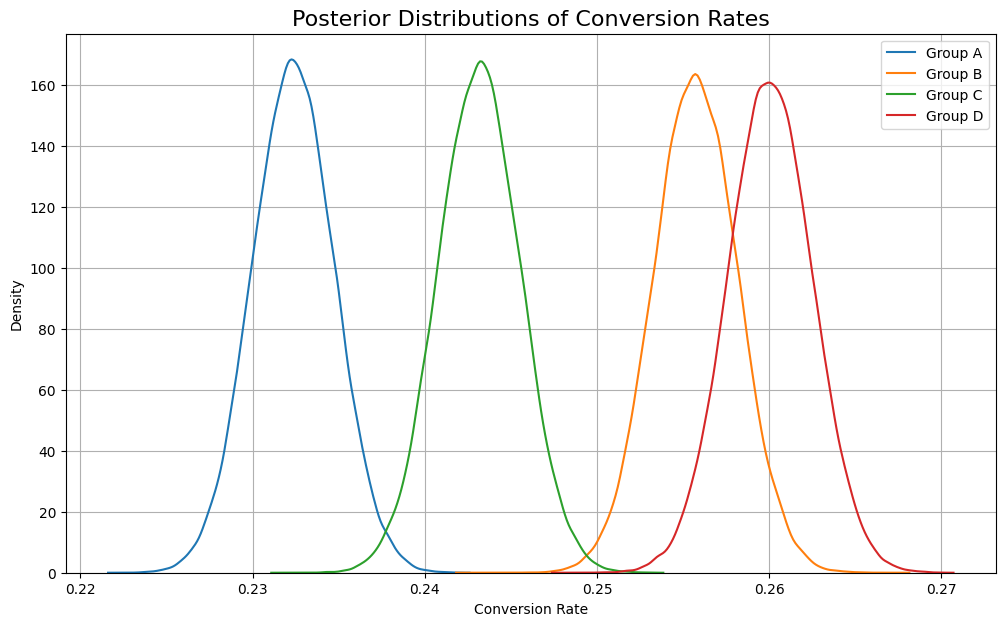



‚úÖ Bayesian: Probability that each group is best
Probability that A is the best: 0.00%
Probability that B is the best: 10.56%
Probability that C is the best: 0.00%
Probability that D is the best: 89.44%


‚úÖ Bayesian Pairwise Superiority Probabilities:


Comparison  P(Group1 > Group2)  P(Group1 < Group2)
0      A > B              0.0000              1.0000
1      A > C              0.0008              0.9992
2      A > D              0.0000              1.0000
3      B > C              0.9999              0.0001
4      B > D              0.1056              0.8944
5      C > D              0.0000              1.0000

In [ ]:
# Test group ÏûëÏÑ±
groups = ['A', 'B', 'C', 'D']

# Í∞Å Ïù¥Î≤§Ìä∏ Î≥Ñ Ïã§Ìóò Í≤∞Í≥º Ï†ïÎ¶¨
CNT_TOTAL_PCID = np.array([33359, 33661, 33640, 33555])
CNT_MYCAR_HOME = np.array([33297, 33592, 33578, 33483])
CNT_MYCAR_HOME_ING = np.array([31934, 32265, 32229, 32035])
CNT_REQUEST_ESTIMATE_CLICK1 = np.array([12254, 13832, 12978, 13644])
CNT_REQUEST_ESTIMATE_CLICK2 = np.array([7420, 8251, 7836, 8331])
CNT_ESTIMATE_COMPLETE = np.array([3377, 3667, 3666, 3669])
CNT_READY_TO_SELL_CLICK = np.array([3433, 2808, 5114, 10045])
CNT_READY_TO_SELL_VIEW = np.array([2730, 2213, 3714, 6689])
CNT_READY_TO_SELL_CONFIRM = np.array([1741, 1587, 2162, 3023])
CNT_PRICE_CONFIRM = np.array([1018, 846, 1264, 1754])
CNT_PHOTO_CONFIRM = np.array([1331, 1223, 1527, 1611])
CNT_INFO_CONFIRM = np.array([687, 541, 994, 1868])
CNT_ESTIMATE_CONFIRM = np.array([41, 39, 49, 50])


# AB test 3Í∑∏Î£π Ïù¥ÏÉÅ Ïù∏ Í≤ΩÏö∞ abtest_multi() ÏÇ¨Ïö©
# abtest_multi(groups, successes, trials, metric_name="")
# Metric Î≥Ñ ÏûëÏÑ±

# Success Metric
# 1. ÌåêÎß§Ï§ÄÎπÑÌïòÍ∏∞ Ï†ïÎ≥¥ ÏûÖÎ†•Ïú®
abtest_multi(groups, CNT_READY_TO_SELL_CONFIRM, CNT_MYCAR_HOME_ING, metric_name="My car to ReadyToSell Confirm CVR")
# 2. ÎÇ¥Ï∞®Í≥† Ìôà - ÌåêÎß§Ï§ÄÎπÑÌïòÍ∏∞ ÌÅ¥Î¶≠Ïú®
abtest_multi(groups, CNT_READY_TO_SELL_CLICK, CNT_MYCAR_HOME_ING, metric_name="My car to ReadyToSell Click CVR")
# 3. ÌåêÎß§Ï§ÄÎπÑÌïòÍ∏∞ ÏßÑÏûÖÏú®
abtest_multi(groups, CNT_READY_TO_SELL_VIEW, CNT_MYCAR_HOME_ING, metric_name="My car to ReadyToSell CVR")

# Guardrail Metric
# 4. ÎπÑÍµêÍ≤¨Ï†Å Ïã†Ï≤≠ Ï†ÑÌôòÏú®
abtest_multi(groups, CNT_ESTIMATE_COMPLETE, CNT_MYCAR_HOME_ING, metric_name="My car to Request a Estimate Complete CVR")

# Sub Metric
# 5. ÎπÑÍµêÍ≤¨Ï†Å Ïã†Ï≤≠ ÌÅ¥Î¶≠Ïú® 1
abtest_multi(groups, CNT_REQUEST_ESTIMATE_CLICK1, CNT_MYCAR_HOME_ING, metric_name="My car to Request a Estimate Click 1 CVR")
# 6. ÎπÑÍµêÍ≤¨Ï†Å Ïã†Ï≤≠ ÌÅ¥Î¶≠Ïú® 2 (ÏÑúÎπÑÏä§ ÏÑ†ÌÉù ÌõÑ ÏµúÏ¢Ö Ïã†Ï≤≠ ÌÅ¥Î¶≠)
abtest_multi(groups, CNT_REQUEST_ESTIMATE_CLICK2, CNT_MYCAR_HOME_ING, metric_name="My car to Request a Estimate Click 2 CVR")
